<a href="https://colab.research.google.com/github/sahil-kishor/Sales-Prediction/blob/main/Machine_Learning_Mid_Course_Assessment_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sales Prediction**
    Predicting sales on store chains of Rossmann Drug Stores in Europe!

##### **Project Type**    - Supervised Machine Learning Model
##### **Contribution**    - Individual
##### **Name -** Sahil Kishor


## **Promblem Statement**

### Imagine yourself as a freelance data scientist ready for the next project adventure. Your task is to select a machine learning project from the list provided or propose an original project idea that resonates with you. Your objective is to identify a specific challenge within the chosen industry domain and design a machine learning solution to address it. Whether you're predicting customer behavior, optimizing processes, or making healthcare more efficient, your project should demonstrate your ability to approach complex problems, preprocess and analyze relevant data, develop and fine-tune models, and interpret results in a meaningful way. Your project will be a testament to your adaptability, curiosity, and aptitude for machine learning.



## **Problem Description**

### ***As the Problem Statement Suggested to Perform a Comple Machine Learning Project, so i have carried out the project on Sales Prediction of Rossmann Drug Stores.***

### Rossmann operates a network of more than 3,000 drug stores across seven European countries. The company faces the challenge of accurately forecasting daily sales for up to six weeks in advance. Sales at Rossmann stores are impacted by various factors, such as promotional activities, competition, school and public holidays, seasonal variations, and local demographics. Due to the diverse circumstances of individual store managers, the accuracy of sales predictions can vary significantly.

###Provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Rossman Dataset
# 'rsd' as the dataset for rossmann drug stores
rsd= pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Machine Learning Project/Rossmann Stores Data.csv', low_memory= False)

In [ ]:
#Loading Store Dataset
# 'sd' for the store dataset
sd = pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Machine Learning Project/store.csv', low_memory= False)

## **Analysing the Rossman Dataset**

In [ ]:
# First View to the Dataset
concat_df = pd.concat([rsd.head(), rsd.tail()])
concat_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


##### **Checking Information about Dataset**

In [ ]:
# Shape, Columms and Rows of the dataset of the rossmann dataset
print(f"Shape of the dataset : {rsd.shape} \n")

print("Data Columns:")
print(rsd.columns,'\n')

rows = rsd.shape[0]
columns = rsd.shape[1]
print(f"The total number of Rows and Columns are:\nRows : {rows}\nColumns : {columns}")

Shape of the dataset : (1017209, 9) 

Data Columns:
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object') 

The total number of Rows and Columns are:
Rows : 1017209
Columns : 9


In [ ]:
#Checking info of data types of rows and columns of the rossmann dataset.
rsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**Summary Statastics Of Dataset**

In [ ]:
#Summary Statastics of the rossmann dataset
rsd.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# Checking for NULL and DUPLICATE values
# Defining a custom fuction to check the amout of Null values and Duplicate values

def rossmanninfo():
  check=pd.DataFrame(index=rsd.columns)   # Making the Columns as the Index
  check["Datatype"]=rsd.dtypes
  check["Not-Null values"]=rsd.count()
  check["Null value"]=rsd.isnull().sum()
  check["Percentage of the null value"] = (rsd.isnull().mean() * 100).round(2)
  check["Duplicate Values"] = (rsd.duplicated().sum())
  check["Percentage of the Duplicate Value"] = (rsd.duplicated().mean() * 100).round(2)
  return check
rossmanninfo()

,Datatype,Not-Null values,Null value,Percentage of the null value,Duplicate Values,Percentage of the Duplicate Value
Store,int64,1017209,0,0.0,0,0.0
DayOfWeek,int64,1017209,0,0.0,0,0.0
Date,object,1017209,0,0.0,0,0.0
Sales,int64,1017209,0,0.0,0,0.0
Customers,int64,1017209,0,0.0,0,0.0
Open,int64,1017209,0,0.0,0,0.0
Promo,int64,1017209,0,0.0,0,0.0
StateHoliday,object,1017209,0,0.0,0,0.0
SchoolHoliday,int64,1017209,0,0.0,0,0.0


**It's good to know that there are no Null or duplicate values, which means that Rossmann Stores have efficiently managed their data.**
**So no data cleaning process has to be gone through.**

In [ ]:
# Counting the number of Stores in the rossmann Dataset
store_count = rsd.Store.nunique()
print(f"The Total number of Rossmann Stores : {store_count}")

The Total number of Rossmann Stores : 1115


In [ ]:
# Counting the total number of different State Holidays
state_holiday_counts = rsd.StateHoliday.value_counts()
state_holidays = pd.DataFrame(state_holiday_counts)
print("The Total number of all the State Holidays of Rossmann Stores :")
state_holidays

The Total number of all the State Holidays of Rossmann Stores :


,StateHoliday
0,986159
a,20260
b,6690
c,4100


In [ ]:
# Looking into the duration of the Rossmann Dataset
print('Start Date :',rsd['Date'].min())
print('End Date :', rsd['Date'].max())

Start Date : 2013-01-01
End Date : 2015-07-31


**This tells us we have a data of almost 3 years.**

In [ ]:
# extract year, month, day and week of year from "Date" and assigning them as new columns in the dataset itself.

rsd['Date']=pd.to_datetime(rsd['Date'])
rsd['Year'] = rsd['Date'].apply(lambda x: x.year)
rsd['Month'] = rsd['Date'].apply(lambda x: x.month)
rsd['Day'] = rsd['Date'].apply(lambda x: x.day)
rsd['WeekOfYear'] = rsd['Date'].apply(lambda x: x.weekofyear)

In [ ]:
# Re-arranging the dataset according to the date and store column
rsd.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
concat_df2 = pd.concat([rsd.head(), rsd.tail()])
concat_df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1


**The code sorts the DataFrame rsd (Rossmann Dataset) first by 'Date' in descending order and then by 'Store' in ascending order within each date.**

## **EDA On Rossman Dataset**

#### **Heatmap of the Rossman Dataset**

In [ ]:
# Creating a correlation matrix for Heatmap
correlation_matrix = rsd.corr()
correlation_matrix

<ipython-input-15-216f31a4beea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rsd.corr()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,0.000290,0.001467,0.000023,0.001421
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,0.001937,-0.005362,0.005136,-0.004880
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,0.023519,0.048768,-0.011612,0.052946
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.001212,0.038179,-0.004473,0.041404
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.001009,-0.000681,0.033428,0.004792
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.024300,-0.011747,-0.108325,0.000572
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.036535,0.103282,0.030538,0.071052
Year,0.000290,0.001937,0.023519,-0.001212,-0.001009,0.024300,-0.036535,1.000000,-0.269382,-0.002485,-0.256619
Month,0.001467,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,-0.269382,1.000000,0.012442,0.967034
Day,0.000023,0.005136,-0.011612,-0.004473,0.033428,-0.108325,0.030538,-0.002485,0.012442,1.000000,0.069624


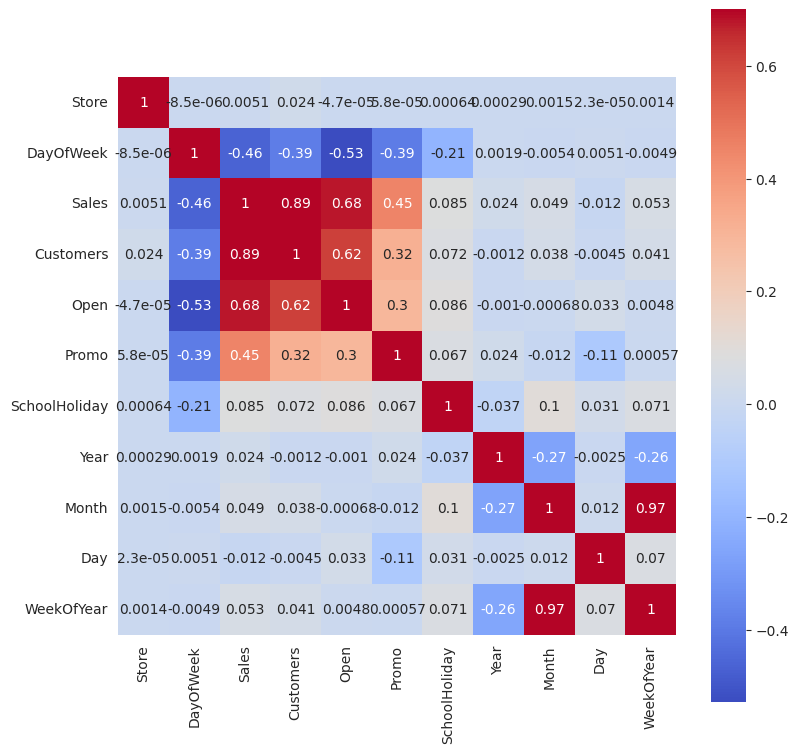

In [ ]:
# Plotting the heatmap for the correlation matrix
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)

# Using coolwarm color scheme
sns.heatmap(correlation_matrix, cmap='coolwarm', vmax=0.7, square=True, annot=True)

plt.show()


<Axes: xlabel='DayOfWeek', ylabel='count'>

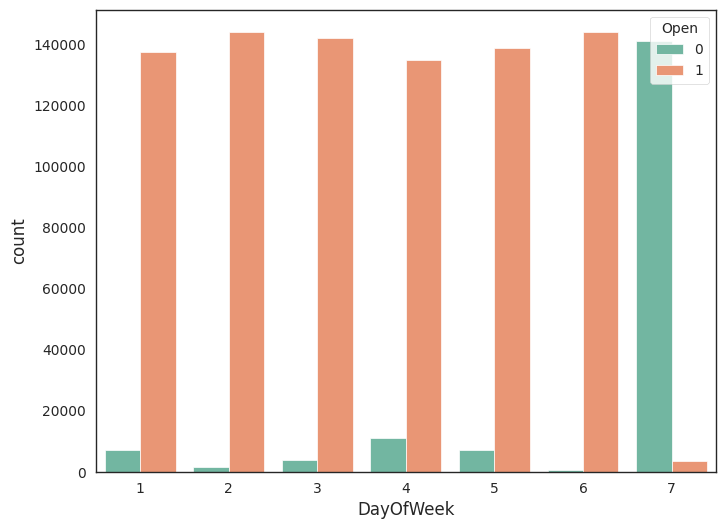

In [ ]:
sns.countplot(x='DayOfWeek', hue='Open', data=rsd, palette='Set2')

**As we can see that in the graph given that Stores mainly closed on Sunday**

<ipython-input-18-d43f6f145b69>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=Promo_sales, palette='Set2')


<Axes: xlabel='Promo', ylabel='Sales'>

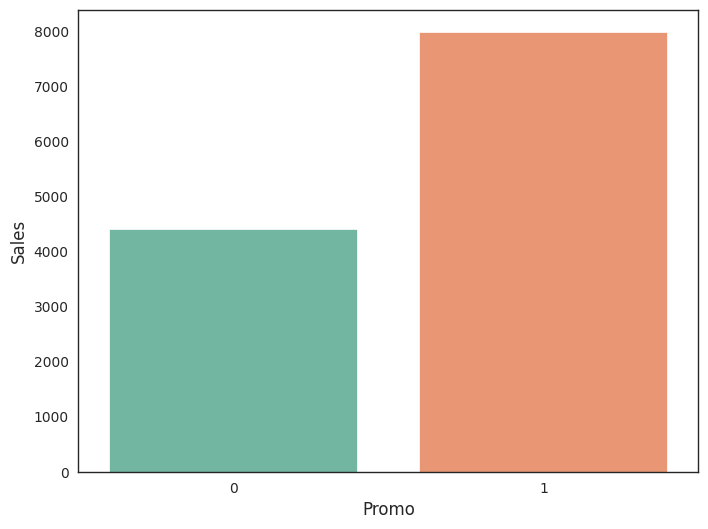

In [ ]:
#Impact of promo on sales
# Grouping the data and calculating the mean sales for each Promo category
Promo_sales = rsd.groupby('Promo')['Sales'].mean().reset_index()

# Plotting the data using seaborn pointplot with a different color palette
sns.barplot(x='Promo', y='Sales', data=Promo_sales, palette='Set2')

**Sales Are nearly doubled High When Promo is Running**

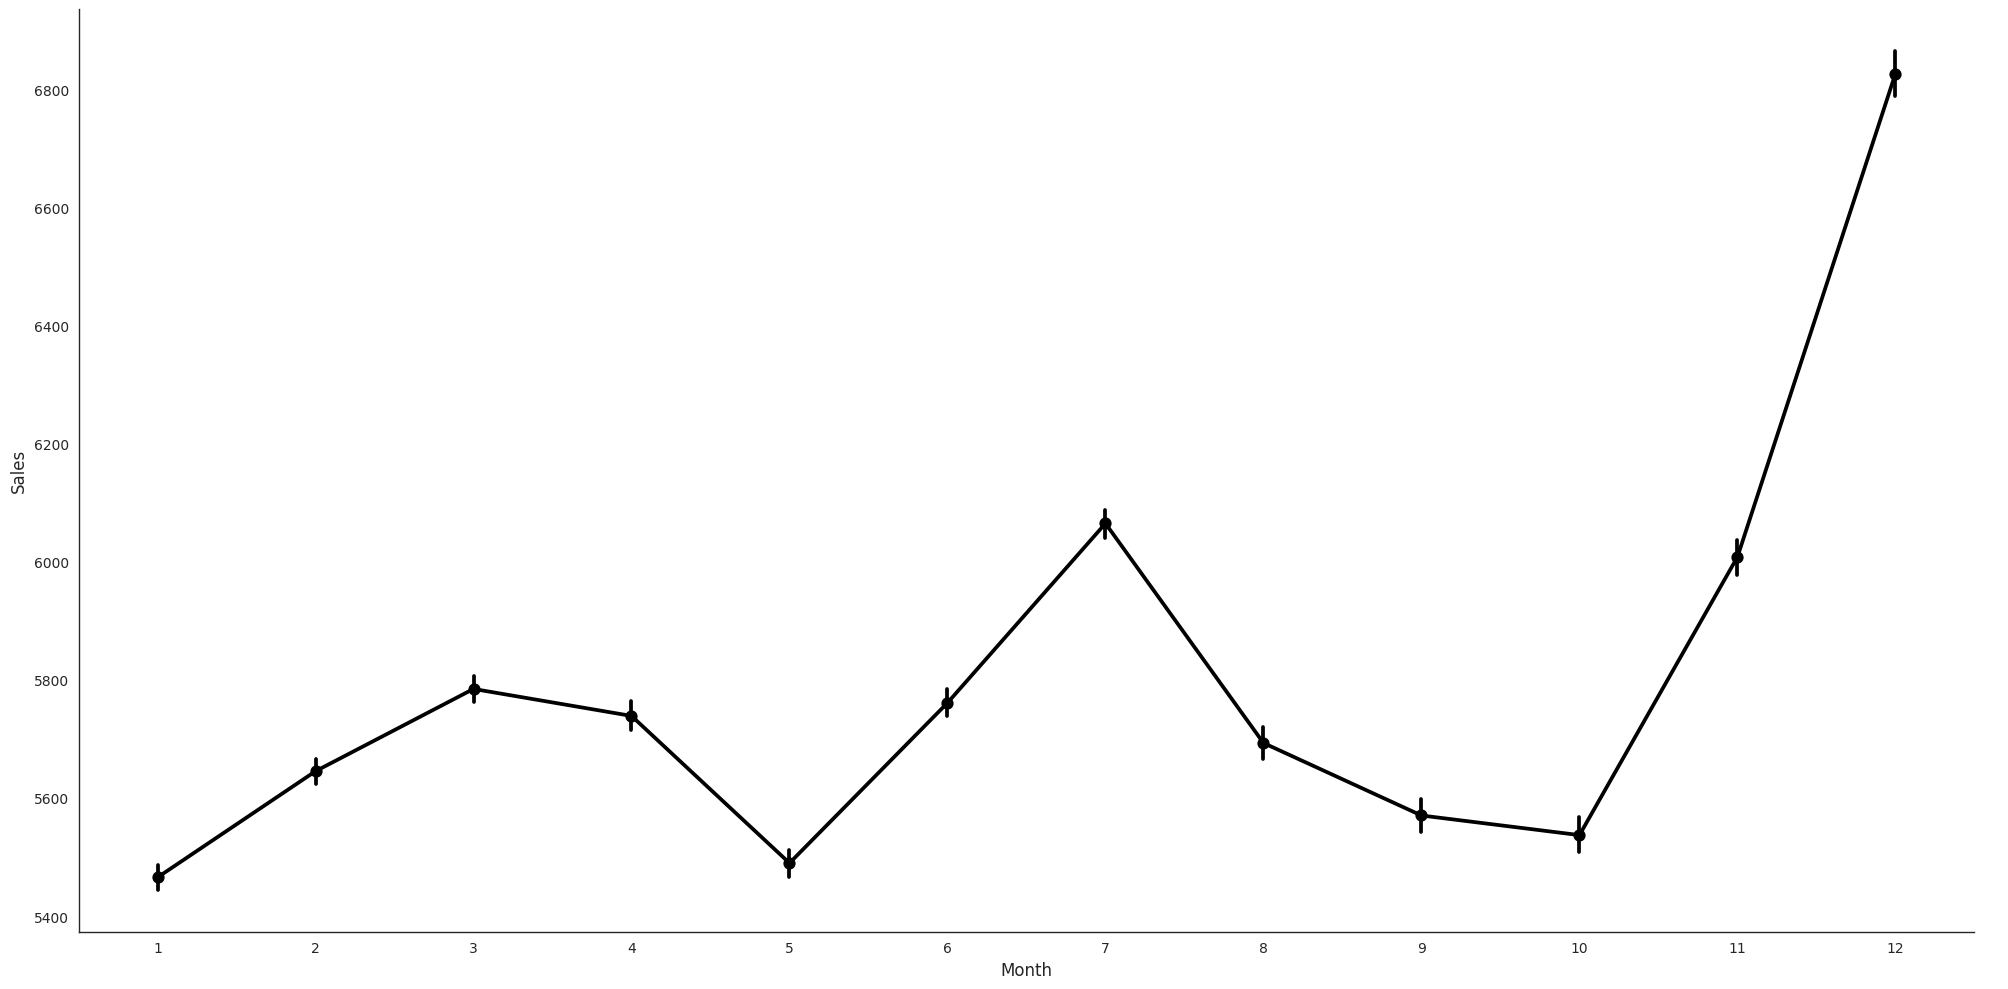

In [ ]:
# Sales Trend over Months of year.
sns.catplot(x="Month", y="Sales", data=rsd, kind="point", aspect=2, height=10, color='black')

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

In [ ]:
# Value Counts of SchoolHoliday Column
rsd.SchoolHoliday.value_counts()
# Counting the total number of different School Holidays
school_holiday_counts = rsd.SchoolHoliday.value_counts()
school_holidays = pd.DataFrame(state_holiday_counts)
print("The Total number of all the School Holidays of Rossmann Stores :")
school_holidays

The Total number of all the School Holidays of Rossmann Stores :


,StateHoliday
0,986159
a,20260
b,6690
c,4100


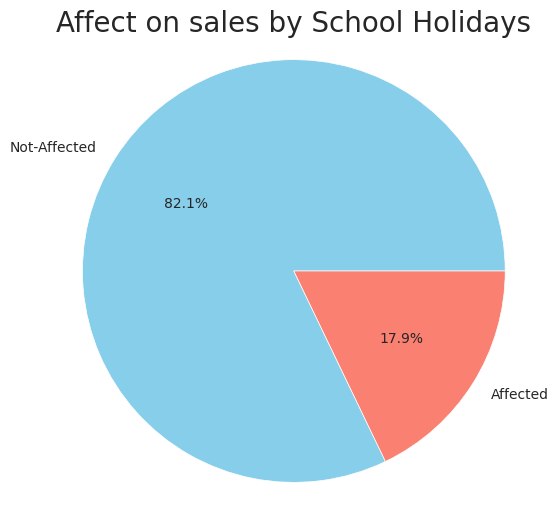

In [ ]:
# Define data
labels = ['Not-Affected', 'Affected']
sizes = rsd['SchoolHoliday'].value_counts()
colors = ['skyblue', 'salmon']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title("Affect on sales by School Holidays", fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

### **Transforming Variable StateHoliday**

In [ ]:
rsd["StateHoliday"] = rsd["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rsd.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

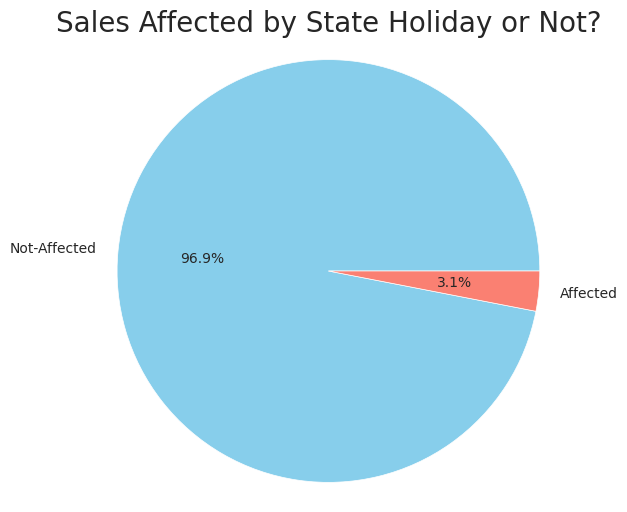

In [ ]:
# Define data
labels = ['Not-Affected', 'Affected']
sizes = rsd['StateHoliday'].value_counts()
colors = ['skyblue', 'salmon']

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title("Sales Affected by State Holiday or Not?", fontsize=20)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

**As Sales isn't much affected by State Holiday so i'm removing this column**

In [ ]:
rsd.drop('StateHoliday',inplace=True,axis=1)

<ipython-input-26-568421b20482>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rsd['Sales'], kde = False,bins=40,color='orange')


<Axes: xlabel='Sales'>

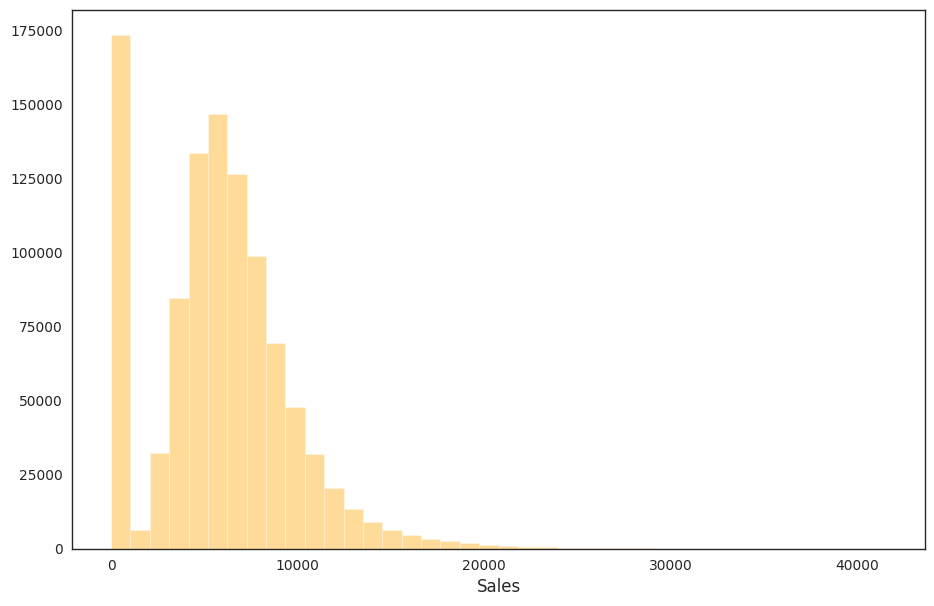

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rsd['Sales'], kde = False,bins=40,color='orange')

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

**Sales vs Customers**

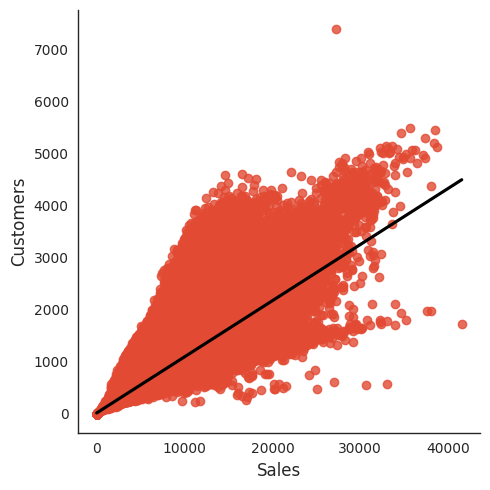

In [ ]:
# Plotting a linear regression model with different colors for each category
sns.lmplot(x='Sales', y='Customers', data=rsd, height=5, aspect=1, line_kws={'color':'black'})

## **Analysing the Store Dataset**

In [ ]:
concat_df3 = pd.concat([sd.head(), rsd.tail()])
concat_df3

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,c,a,1270.0,9.0,2008.0,0.0,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct",...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0.0,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0.0,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017204,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-01-01,0.0,0.0,0.0,0.0,1.0,2013.0,1.0,1.0,1.0
1017205,1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-01-01,0.0,0.0,0.0,0.0,1.0,2013.0,1.0,1.0,1.0
1017206,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-01-01,0.0,0.0,0.0,0.0,1.0,2013.0,1.0,1.0,1.0
1017207,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-01-01,0.0,0.0,0.0,0.0,1.0,2013.0,1.0,1.0,1.0
1017208,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-01-01,0.0,0.0,0.0,0.0,1.0,2013.0,1.0,1.0,1.0


##### **Checking Information about Dataset**

In [ ]:
# Shape, Columms and Rows of the dataset of the store dataset
print(f"Shape of the dataset : {sd.shape} \n")

print("Data Columns:")
print(sd.columns,'\n')

rows = sd.shape[0]
columns = sd.shape[1]
print(f"The total number of Rows and Columns are:\nRows : {rows}\nColumns : {columns}")

Shape of the dataset : (1115, 10) 

Data Columns:
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object') 

The total number of Rows and Columns are:
Rows : 1115
Columns : 10


In [ ]:
#Checking info of data as data types and rows and columns
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Checking for NULL and DUPLICATE values
# Defining a custom fuction to check the amout of Null values and Duplicate values

def rossmanninfo():
  check=pd.DataFrame(index=sd.columns)   # Making the Columns as the Index
  check["Datatype"]=sd.dtypes
  check["Not-Null values"]=sd.count()
  check["Null value"]=sd.isnull().sum()
  check["Percentage of the null value"] = (sd.isnull().mean() * 100).round(2)
  check["Duplicate Values"] = (sd.duplicated().sum())
  check["Percentage of the Duplicate Value"] = (sd.duplicated().mean() * 100).round(2)
  return check
rossmanninfo()

,Datatype,Not-Null values,Null value,Percentage of the null value,Duplicate Values,Percentage of the Duplicate Value
Store,int64,1115,0,0.00,0,0.0
StoreType,object,1115,0,0.00,0,0.0
Assortment,object,1115,0,0.00,0,0.0
CompetitionDistance,float64,1112,3,0.27,0,0.0
CompetitionOpenSinceMonth,float64,761,354,31.75,0,0.0
CompetitionOpenSinceYear,float64,761,354,31.75,0,0.0
Promo2,int64,1115,0,0.00,0,0.0
Promo2SinceWeek,float64,571,544,48.79,0,0.0
Promo2SinceYear,float64,571,544,48.79,0,0.0
PromoInterval,object,571,544,48.79,0,0.0


**Distribution Of Different Store Types**

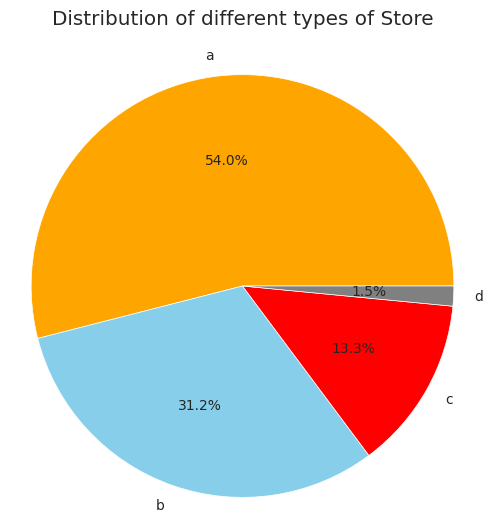

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = sd.StoreType.value_counts()
colors = ['orange', 'Skyblue' , 'red' , 'gray']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of different types of Store\n")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [ ]:
# dropping columns/features with high percentage of null values
sd = sd.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

<ipython-input-34-93319b3fe7e7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

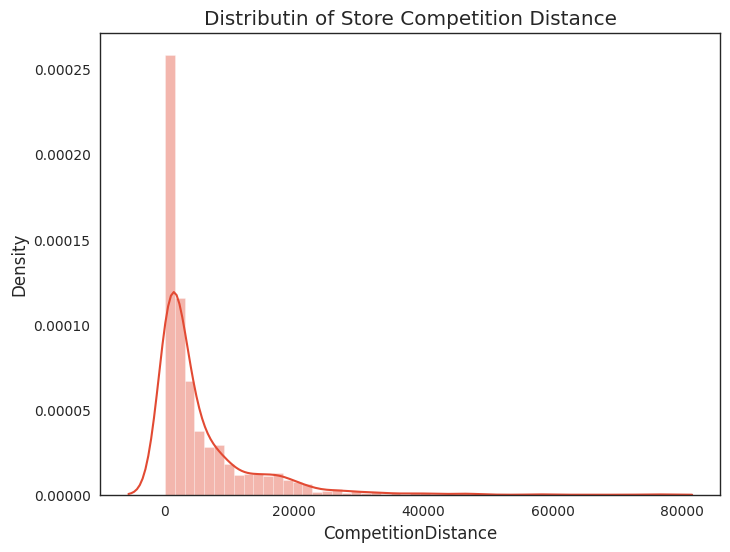

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# The distribution Competition Distance without the null values

sns.distplot(sd.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset
sd.CompetitionDistance.fillna(sd.CompetitionDistance.median(), inplace=True)

**Checking stores with their assortment type**

<ipython-input-36-bf26ce628c98>:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  store_type = sns.countplot(x='StoreType', hue='Assortment', data=sd, palette=colors)


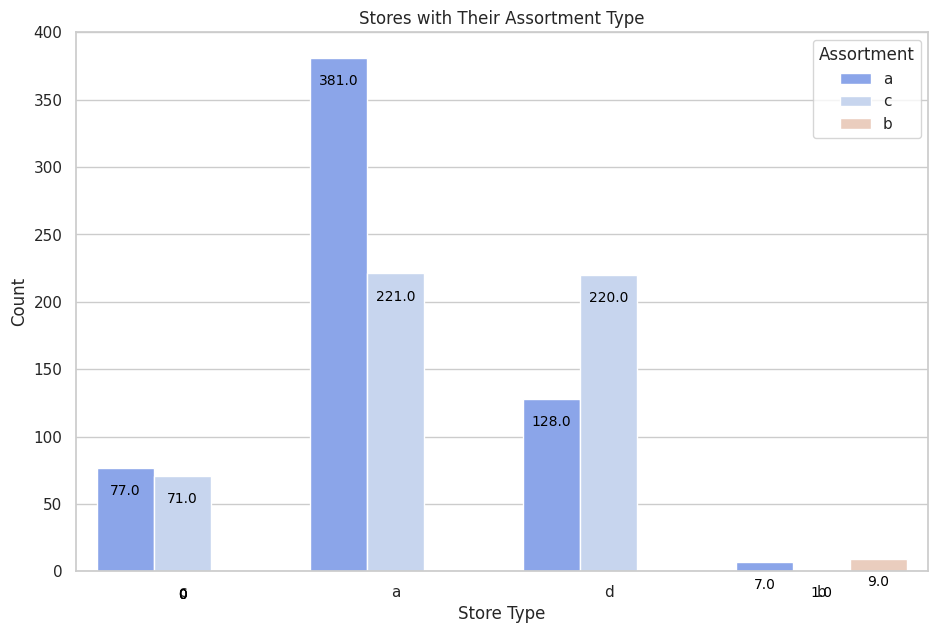

In [ ]:
#stores with their assortment type
# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("coolwarm", 4)

# Plotting the count of store types with their assortment types
plt.figure(figsize=(11, 7))
store_type = sns.countplot(x='StoreType', hue='Assortment', data=sd, palette=colors)

# Adding annotations to the bars
for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top', color='black', size=10)

# Setting title and labels
plt.title("Stores with Their Assortment Type")
plt.xlabel("Store Type")
plt.ylabel("Count")

plt.show()

<ipython-input-37-b812d246406d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Sales', data=rsd, palette=custom_palette)
<ipython-input-37-b812d246406d>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(x='Year', y='Sales', data=rsd, palette=custom_palette)


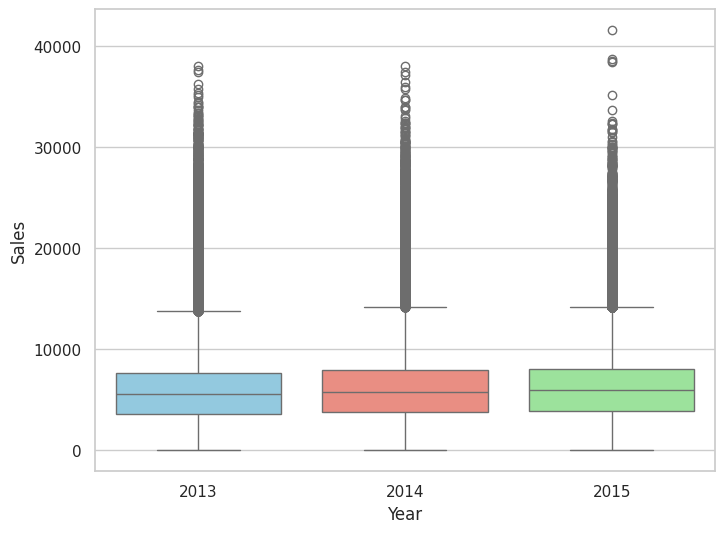

In [ ]:
custom_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']
# Plotting year vs sales using box plot
sns.boxplot(x='Year', y='Sales', data=rsd, palette=custom_palette)
plt.show()

***We can see that there is not such significant differences in these 3 years in terms of sales.***
***Even the Outliers are also in same amount***

### **Merging Two Datasets**

In [ ]:
# Merging Both the datasets using left Join
mergedf = pd.merge(rsd, sd, how='left', on='Store')
mergedf.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
# Shape, Columms and Rows of the dataset of the merged dataset
print(f"Shape of the dataset : {sd.shape} \n")

print("Data Columns:")
print(sd.columns,'\n')

rows = sd.shape[0]
columns = sd.shape[1]
print(f"The total number of Rows and Columns are:\nRows : {rows}\nColumns : {columns}")

Shape of the dataset : (1115, 5) 

Data Columns:
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'], dtype='object') 

The total number of Rows and Columns are:
Rows : 1115
Columns : 5


## **EDA On Merged Dataset**

#### **Heatmap Of Merged Dataset**

<ipython-input-40-3a4f41dcc230>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mergedf.corr().abs(), annot=True, cmap='coolwarm')


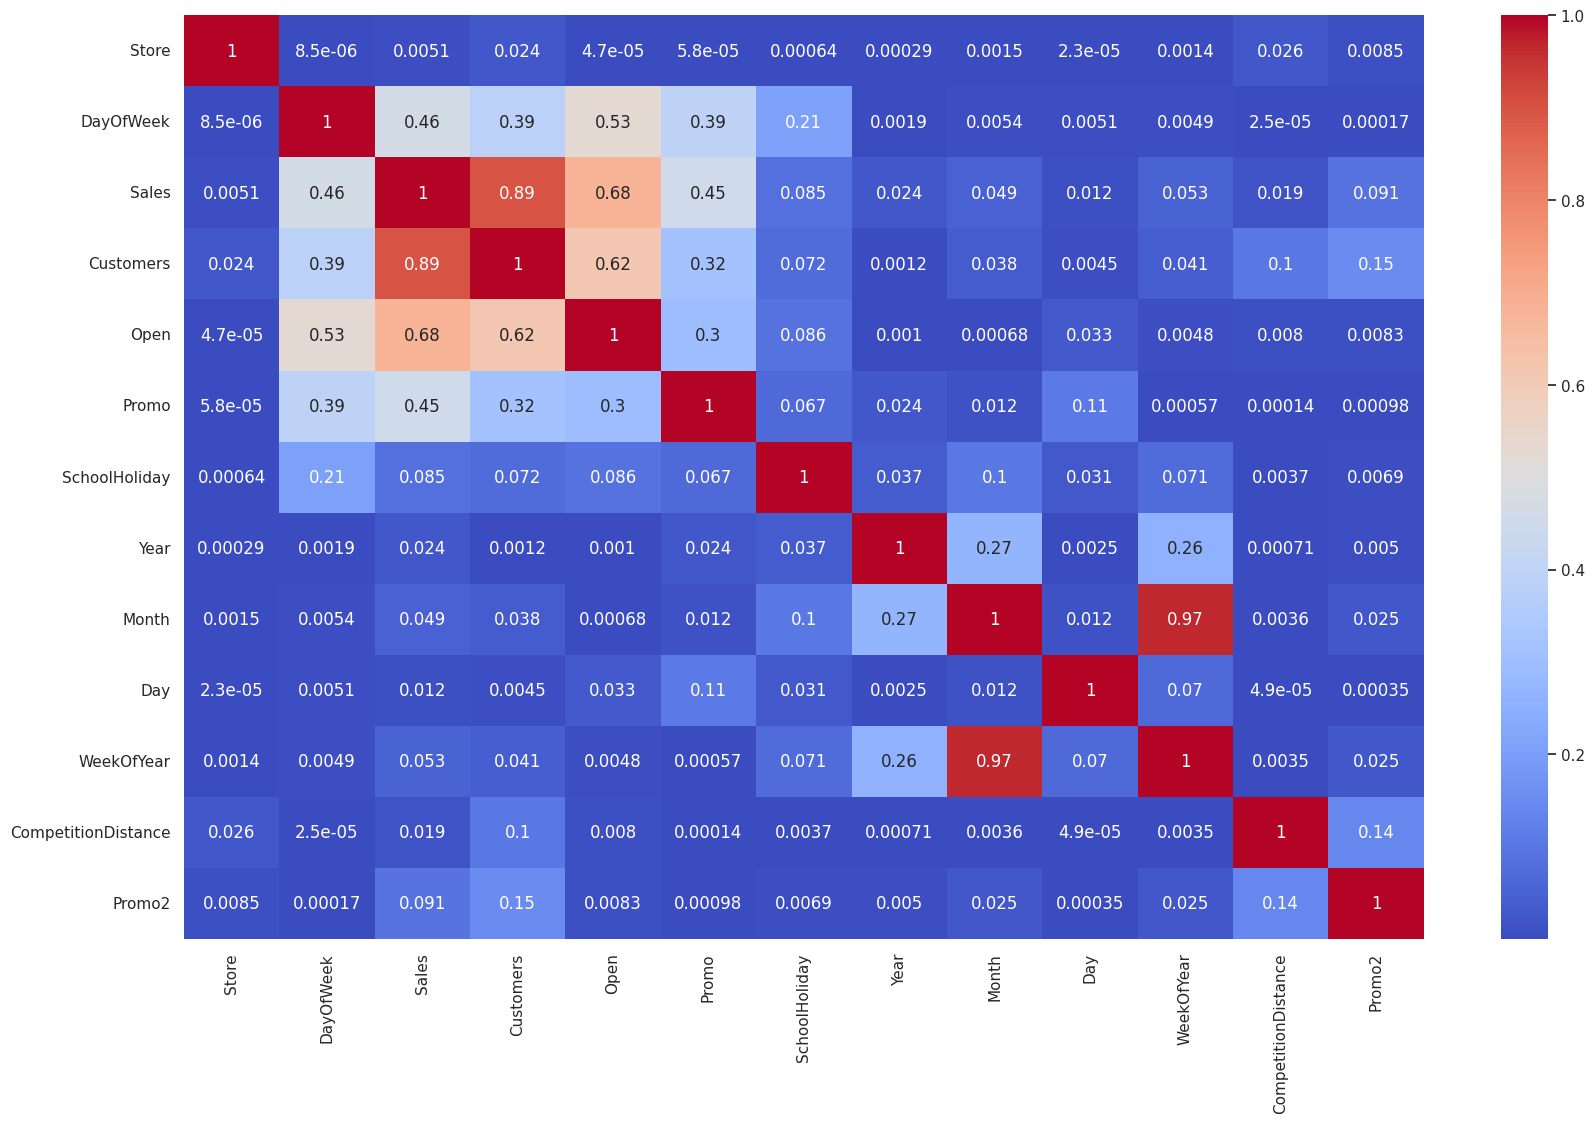

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(mergedf.corr().abs(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Assigning a new column in the dataframe for Average customer sales
mergedf["Avg_Customer_Sales"] = mergedf.Sales/mergedf.Customers

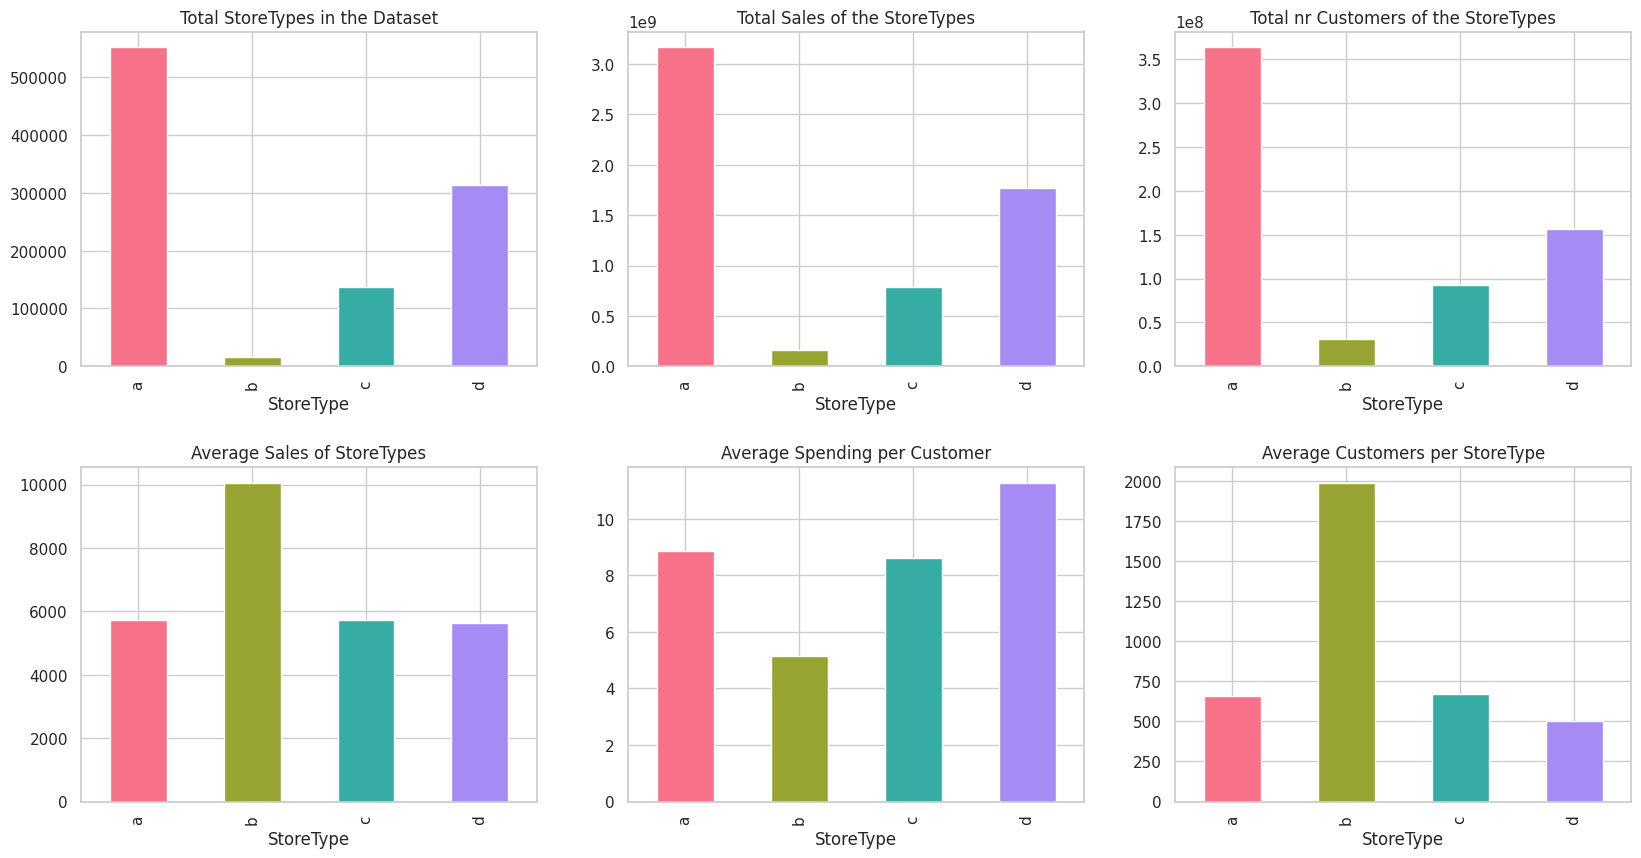

In [ ]:
custom_palette = sns.color_palette("husl", 4)

# Create subplots
f, ax = plt.subplots(2, 3, figsize=(20, 10))

# Plotting each group with a different color palette
mergedf.groupby("StoreType")["Store"].count().plot(kind="bar", ax=ax[0, 0], title="Total StoreTypes in the Dataset", color=custom_palette)
mergedf.groupby("StoreType")["Sales"].sum().plot(kind="bar", ax=ax[0, 1], title="Total Sales of the StoreTypes", color=custom_palette)
mergedf.groupby("StoreType")["Customers"].sum().plot(kind="bar", ax=ax[0, 2], title="Total nr Customers of the StoreTypes", color=custom_palette)
mergedf.groupby("StoreType")["Sales"].mean().plot(kind="bar", ax=ax[1, 0], title="Average Sales of StoreTypes", color=custom_palette)
mergedf.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind="bar", ax=ax[1, 1], title="Average Spending per Customer", color=custom_palette)
mergedf.groupby("StoreType")["Customers"].mean().plot(kind="bar", ax=ax[1, 2], title="Average Customers per StoreType", color=custom_palette)

# Adjust spacing
plt.subplots_adjust(hspace=0.3)

# Show the plot
plt.show()


**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

#### **Visualisation of Promotions**

<ipython-input-43-4db4a2825840>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.catplot(data=mergedf, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind='point', palette=custom_palette)


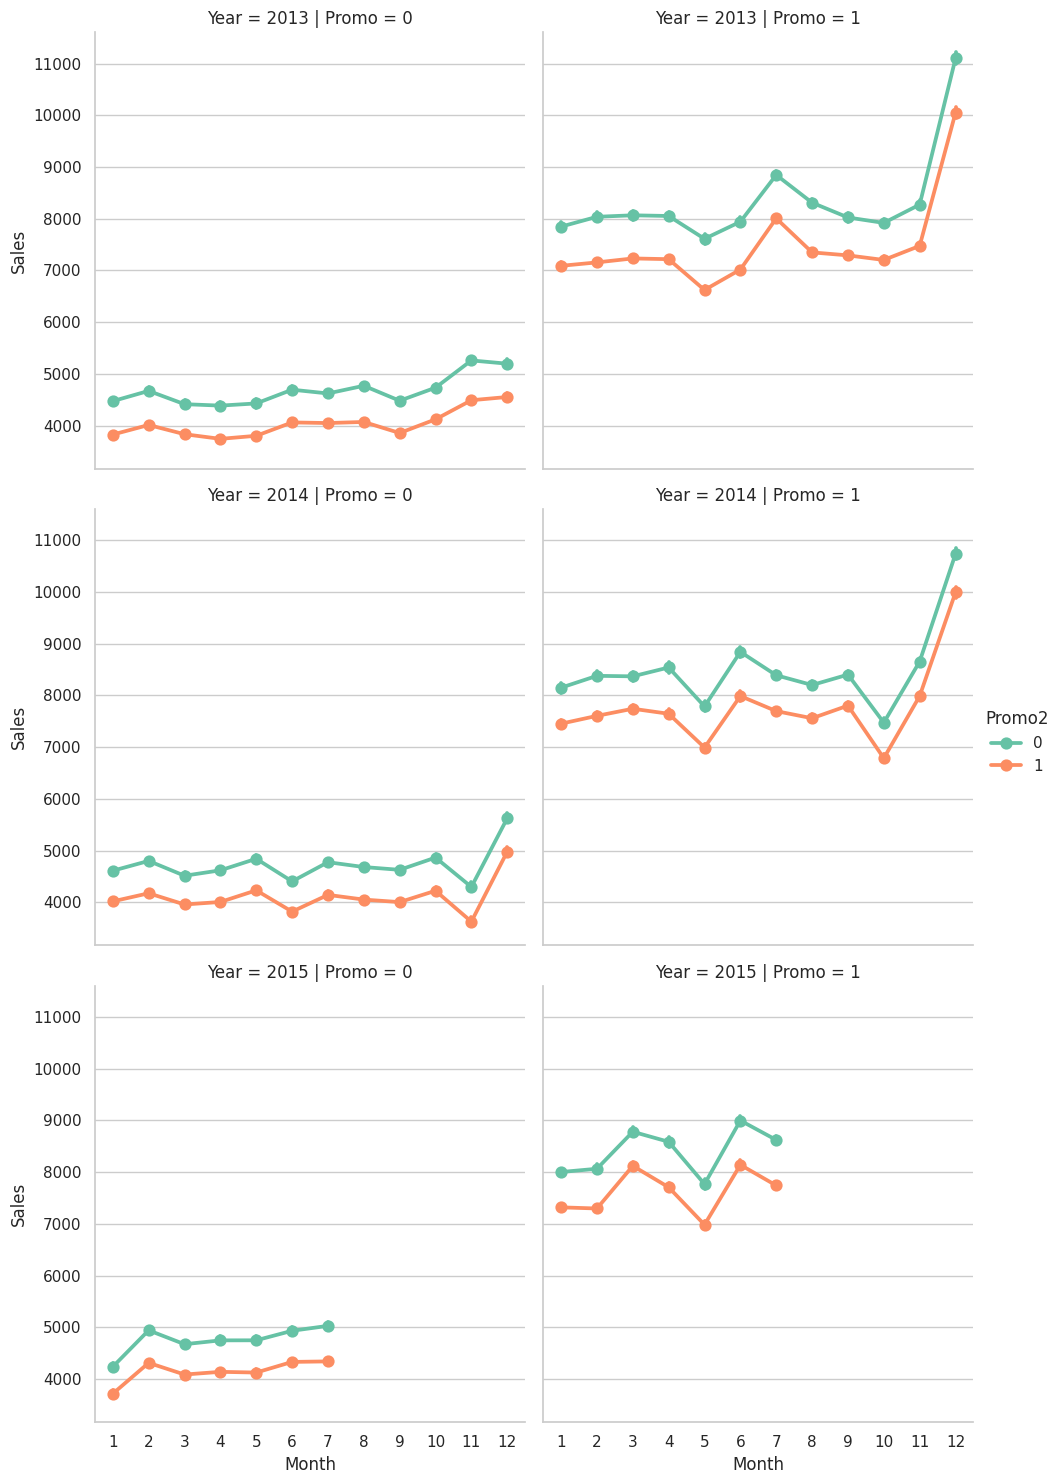

In [ ]:
custom_palette = sns.color_palette("Set2")

# Plotting the catplot with different colors for data points
sns.catplot(data=mergedf, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind='point', palette=custom_palette)
# So, its obvious, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

**As We can see that when the promo is running Sales are high**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


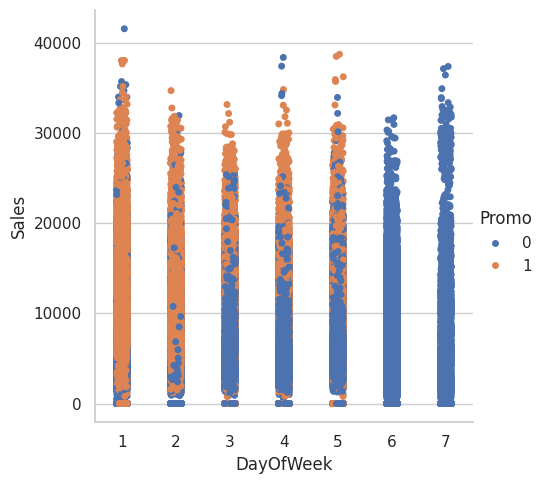

In [ ]:
sns.catplot(data = mergedf, x = "DayOfWeek", y = "Sales", hue = "Promo")

**There are no promotion in the weekend. However, the sales are very high.**

### **Trends on a Yearly Basis.**

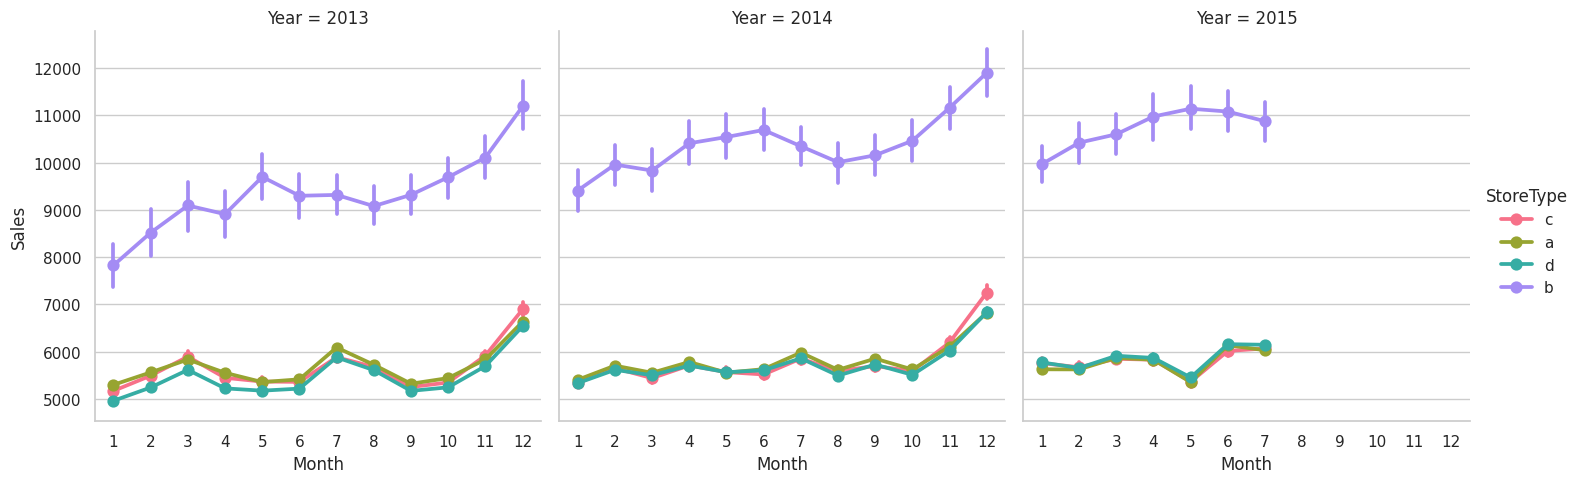

In [ ]:
custom_palette = sns.color_palette("husl", 4)

# Plotting the line chart with different colors for each category
sns.catplot(data=mergedf, x="Month", y="Sales", col="Year", hue="StoreType", kind="point", palette=custom_palette)

# Show the plot
plt.show()

### **The Competition Distance and impact on the sales.**

In [ ]:
mergedf.CompetitionDistance.describe()

count    1.017209e+06
mean     5.422021e+03
std      7.706918e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.325000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [ ]:
# The obsverations are continous numbers, so we need to convert them into a categories.
# create a new variable for category.
mergedf["CompetitionDistance_Cat"] = pd.cut(mergedf["CompetitionDistance"], 5)

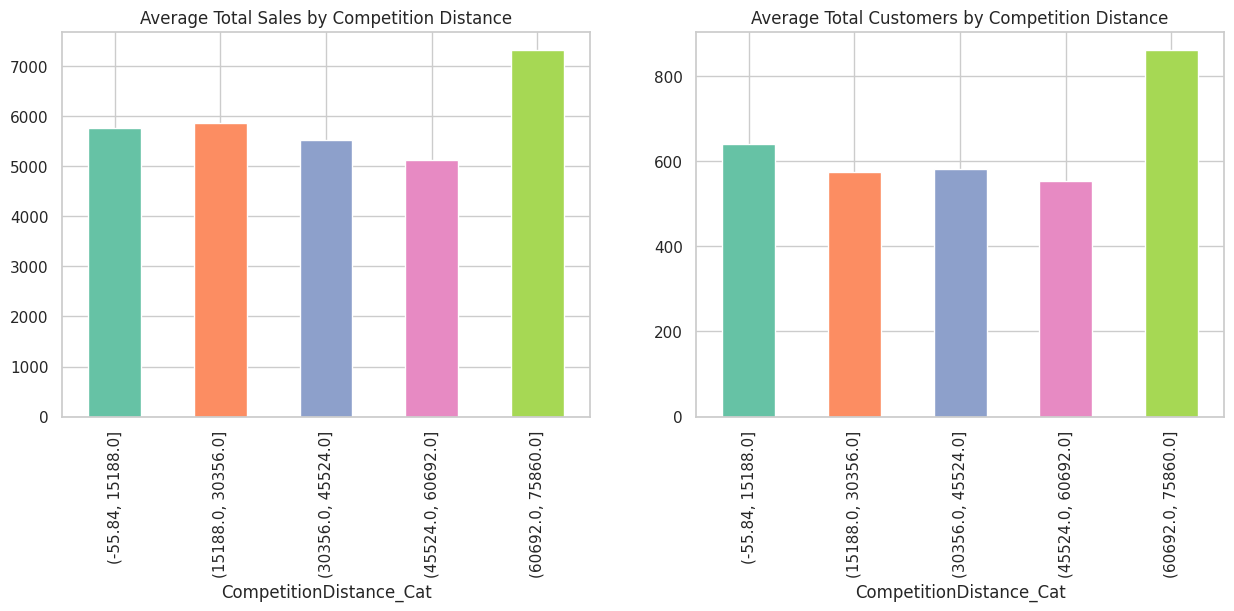

In [ ]:
custom_palette = sns.color_palette("Set2")

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting
mergedf.groupby("CompetitionDistance_Cat").Sales.mean().plot(kind="bar", title="Average Total Sales by Competition Distance", ax=ax[0], color=custom_palette)
mergedf.groupby("CompetitionDistance_Cat").Customers.mean().plot(kind="bar", title="Average Total Customers by Competition Distance", ax=ax[1], color=custom_palette)

# Show the plot
plt.show()

**It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)**

In [ ]:
mergedf.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

**Box plot shows that we have a very high outliers in sales**

<Axes: ylabel='Sales'>

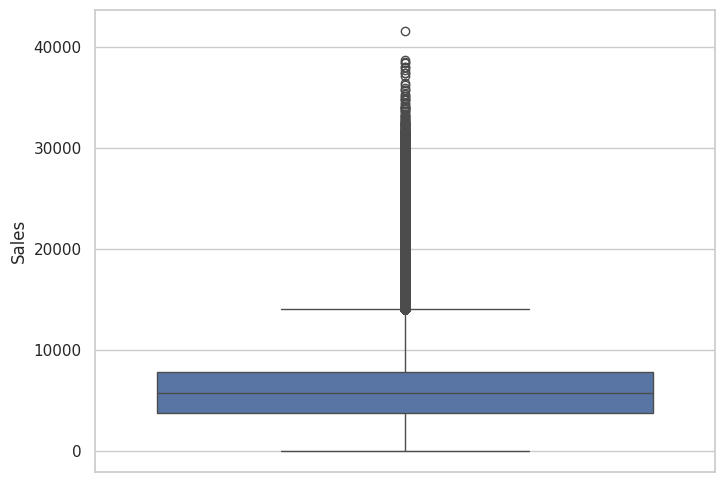

In [ ]:
#checking outliers in sales
sns.boxplot(rsd['Sales'])

**Removing Outliers Of Sales Column**

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    # Calculate quartiles and interquartile range
    q1, q3 = df_in[col_name].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Calculate lower and upper bounds
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    # Filter outliers
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
mergedf= remove_outlier(mergedf, 'Sales')

# **Conclusion of the analysis:**

* **Sales are highly correlated to number of Customers.**

* **The most selling and crowded store type is A.**

* **StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**

* **StoreTybe D had the highest buyer cart.**

* **Promo runs only in weekdays.**

* **For all stores, Promotion leads to increase in Sales and Customers both.**

* **More stores are opened during School holidays than State holidays.**

* **The stores which are opened during School Holiday have more sales than normal days.**

* **Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**

* **Promo2 doesnt seems to be correlated to any significant change in the sales amount.**

* **Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

### **Drop Subsets Of Data Where Might Cause Bias**

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
mergedf = mergedf[mergedf.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
mergedf = mergedf.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
mergedf[mergedf.Sales == 0]['Store'].sum()

31460

In [ ]:
# check the percentage of open stored with zero sales
mergedf[mergedf.Sales == 0]['Sales'].sum()/mergedf.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
mergedf = mergedf[mergedf.Sales != 0]

In [ ]:
# Making a copy of the dataframe to work on
df_new=mergedf.copy()

In [ ]:
# Performing one-hot encoding on the new dataset.
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


<ipython-input-61-c8a1a78bebcb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=df_new, palette='husl')


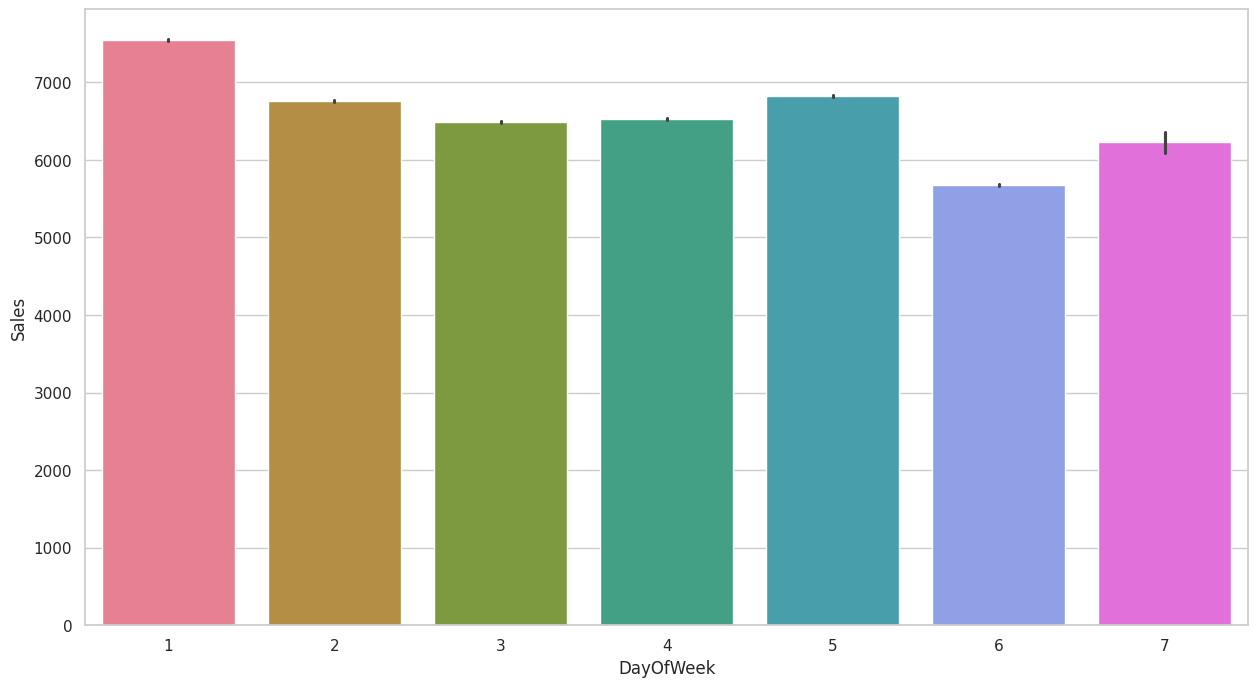

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15, 8))
sns.barplot(x='DayOfWeek', y='Sales', data=df_new, palette='husl')
plt.show()

**From plot it can be sen that most of the sales have been on 1st and last day of week**

#### **Setting Features and Target Variables**

In [ ]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(817644, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

#### **Splitting Dataset Into Training Set and Test Set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-1507.441798569973

In [ ]:
regressor.coef_

array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1329406.2402058854

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.998803210951

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807496727472854

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823919595957616

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

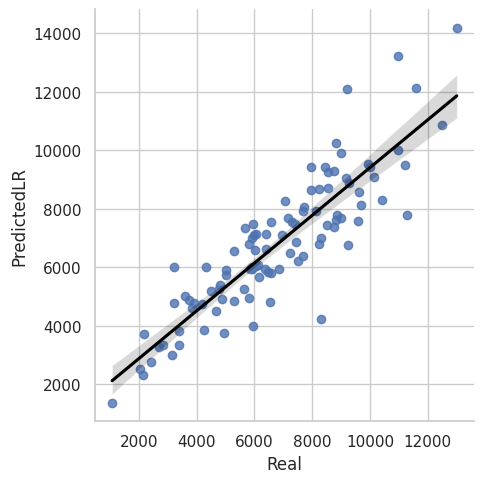

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

## **Inferences On Linear Regression Coefficients**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:34:24   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -993.1075      5.669   -175.169      0.000   -1004.219    -981.996
DayOfWeek             -21.0704      0.785    -26.837      0.000     -22.609     -19.532
Customers               7.2260      0.005   1471.966      0.000       7.216       7.236
Promo                1093.4894      2.768    395.028      0.000    1088.064    1098.915
SchoolHoliday          27.2192      3.326      8.183      0.000      20.700      33.738
Month                  33.1415      1.433     23.134      0.000      30.334      35.949
Day                     1.2777      0.152      8.418      0.000       0.980       1.575
WeekOfYear             -3.3867      0.330    -10.267      0.000      -4.033      -2.740
CompetitionDistance     0.0240      0.000    140.522      0.000       0.024       0.024
Promo2                307.7765      2.662    115.635      0.000     302.560     312.993
StoreType_a            66.5792      4.780     13.929      0.000      57.211      75.948
StoreType_b         -2140.7862     12.728   -168.195      0.000   -2165.733   -2115.840
StoreType_c           -81.9285      5.313    -15.419      0.000     -92.342     -71.514
StoreType_d          1163.0279      5.024    231.517      0.000    1153.182    1172.874
Assortment_a         1114.6637      6.456    172.654      0.000    1102.010    1127.317
Assortment_b        -3510.5496     15.385   -228.183      0.000   -3540.703   -3480.396
Assortment_c         1402.7783      6.642    211.194      0.000    1389.760    1415.797
==============================================================================
Omnibus:                    49108.747   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145480.294
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     8.34e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **2. LARS Lasso Regression**

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825739
Training RMSE : 1155.0769465274698 Testing RMSE : 1153.0608903320883
Training MAPE : 14.215633319957128 Testing MAPE : 14.233294529232587


## **3. Decision Tree Regression**

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9635058030756848 , Test Score : 0.9354618142406202
Training RMSE : 471.231263754792 Testing RMSE : 627.9134182263033
Training MAPE : 5.025365374933249 Testing MAPE : 6.689683015381292


### **Decision Tree With Hyper Parameter Tuning**

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import RandomizedSearchCV

# tree = DecisionTreeRegressor()
# params = {
#     'min_samples_split': [2, 3, 5, 7],
#     'min_samples_leaf': [6, 8, 10]
# }

# grid = RandomizedSearchCV(estimator=tree, param_distributions=params, verbose=True, cv=10)
# grid.fit(X_train, y_train)
# print(grid.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'min_samples_split': 2, 'min_samples_leaf': 8}


 **I trained Model with hyper parameters to not run everytime i record the result, as it takes too much time to execute**

**Here are our best parameters for Decision Tree**

**[ min_samples_split=2,
  min_samples_leaf=8 ]**

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=2)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9635058030756848 , Test Score : 0.9354618142406202
Training RMSE : 471.231263754792 Testing RMSE : 627.9134182263033
Training MAPE : 5.025365374933249 Testing MAPE : 6.689683015381292


In [ ]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

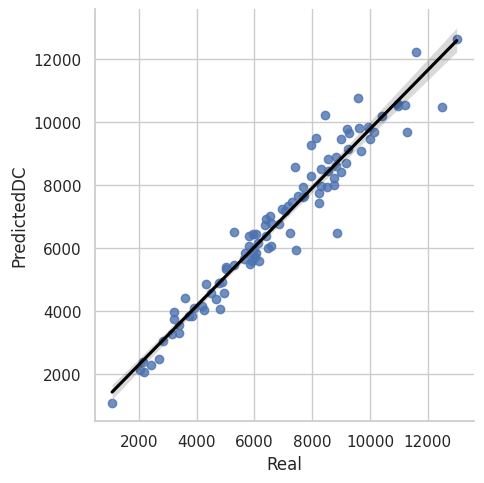

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'})

# **4. Support Vector Regression**

### ***Support Vector Regression ran for atleast 8 straight hours overnight, still was not able to execute.***
### ***So I am commenting it out.***

In [ ]:
# %%time
# from sklearn.svm import SVR
# svr=SVR()
# svr_reg=svr.fit(X_train,y_train)
# svr

In [ ]:
# print("Regresion Model Score" , ":" , svr_reg.score(X_train, y_train) , "," ,
#      "Out of Sample Test Score" ,":" , svr_reg.score(X_test, y_test))

# y_predicted = svr_reg.predict(X_train)
# y_test_predicted = svr_reg.predict(X_test)

# print("Training RMSE", ":", rmse(y_train, y_predicted),
#      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#      "Testing MAPE", ":", mape(y_test, y_test_predicted))

## **5. K-Nearest Neighbors Regression**

### ***K-Nearest Neighbors Regression took a long time to execute so i am commenting it out. So that it doesnot create any Bias***

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(n_neighbors = 30)
# knnreg = knn.fit(X_train, y_train)

In [ ]:
# print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
#       "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

# y_predicted = knnreg.predict(X_train)
# y_test_predicted = knnreg.predict(X_test)

# print("Training RMSE", ":", rmse(y_train, y_predicted),
#       "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#       "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7372261980067728 , Out of Sample Test Score : 0.7166584142323265
Training RMSE : 1264.4836631252208 Testing RMSE : 1315.6687141978773
Training MAPE : 16.244493588517088 Testing MAPE : 16.928417525093515


### **6. Random Forest With Hyper Parameter Tuning**

In [ ]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Random Forest**

**{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }**

In [ ]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9937971263794982 , Test Score : 0.9563433960909664
Training RMSE : 194.27577795736 Testing RMSE : 516.4358252259884
Training MAPE : 2.1125269448495447 Testing MAPE : 5.661530172557957


In [ ]:
y_test_predicted_2

array([8179.9875, 6150.325 , 8382.025 , ..., 6464.125 , 6196.675 ,
       4560.975 ])

In [ ]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
97497,9158,8998.3375,159.6625
204398,8507,8222.2125,284.7875
208001,7675,7861.2000,186.2000
1013343,3132,3091.8625,40.1375


In [ ]:
#Statistical description of our predictions and actual values
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,6775.070000,6740.182250,376.399250
std,2534.335345,2444.358530,374.081360
min,1072.000000,1104.212500,12.712500
25%,5004.750000,5269.403125,126.034375
50%,6548.000000,6476.200000,287.918750
75%,8598.250000,8504.156250,497.993750
max,13001.000000,12606.387500,2062.412500


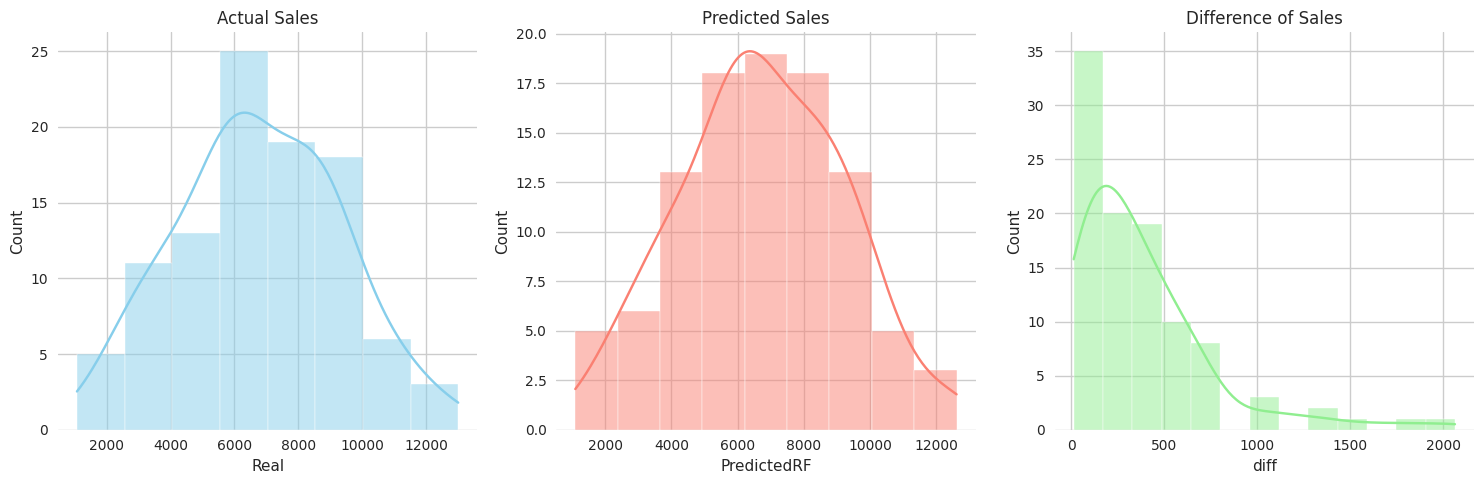

In [ ]:
#plotting the actual,predicted & difference of SALES
# Set the style
sns.set_style('whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for actual, predicted, and difference of sales using Seaborn
sns.histplot(dataset_rf['Real'], ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Actual Sales')

sns.histplot(dataset_rf['PredictedRF'], ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Predicted Sales')

sns.histplot(dataset_rf['diff'], ax=axes[2], color='lightgreen', kde=True)
axes[2].set_title('Difference of Sales')

# Show the plot
plt.tight_layout()
plt.show()


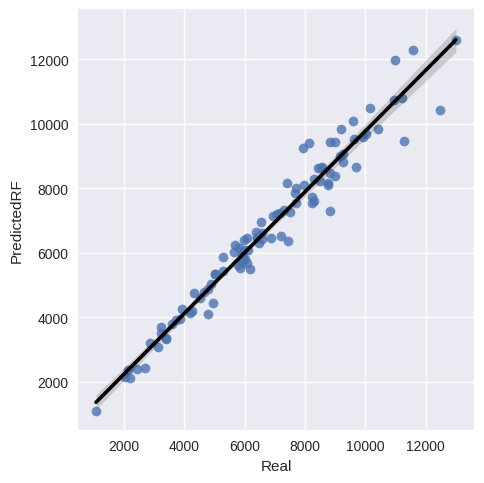

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'Black'}, aspect=1);

**As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.**

## **Feature Importance On Random Forest Regressor**

As we can see that Random Forest has the highest test score

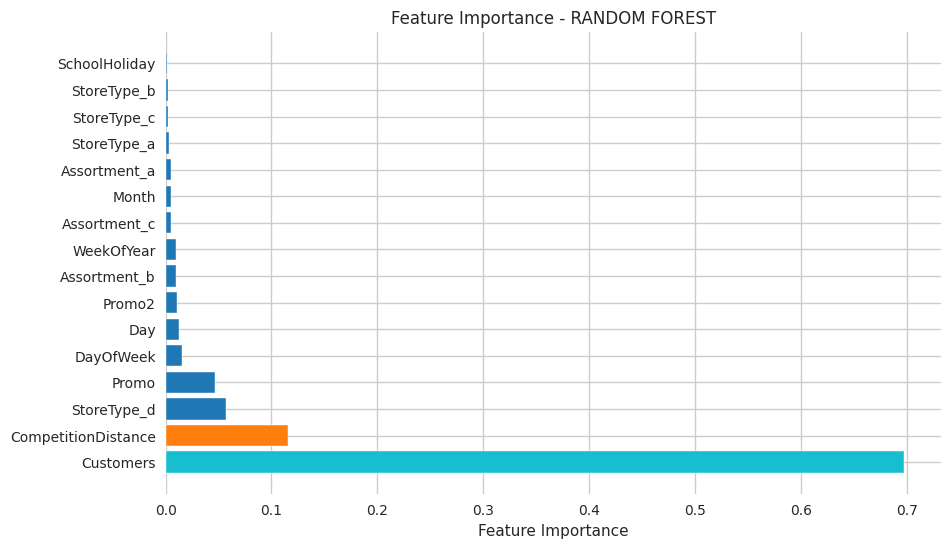

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_feature_importance(feature_importance, columns, model_name):
    # Sort feature importances in descending order
    sorted_idx = feature_importance.argsort()[::-1]
    sorted_columns = [columns[i] for i in sorted_idx]
    sorted_importance = feature_importance[sorted_idx]

    # Create a pastel colormap
    pastel_colors = plt.cm.tab10(np.linspace(0, 1, len(columns)))
    pastel_cmap = mcolors.ListedColormap(pastel_colors)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(columns)), sorted_importance, color=pastel_cmap(sorted_importance / sorted_importance.max()))
    plt.yticks(range(len(columns)), sorted_columns)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance - {model_name}')
    plt.show()

# Call the function to plot feature importance
plot_feature_importance(rdfreg.feature_importances_, columns[:], 'RANDOM FOREST')


**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.**

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])

# **Conclusion**

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780750,0.782392
Lasso Regression,0.780731,0.782369
Decision Tree,0.963506,0.935462
Decision Tree(hyperparameters),0.963506,0.935462
Random Forest Regression,0.993797,0.956343


### **Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average.**



Thank You.!